In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/combined_data/cleaned_data_1.csv')

In [4]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Linear

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


-5015.985854166331


# Ridge

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [10]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)


/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 40}
-4991.128310231192


# Lasso

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [17]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=3)

lasso_reg.fit(X,y)


/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 5}
-4780.984513506362


In [20]:
pred = lasso_reg.predict(X_test)

In [21]:
pred 

array([145.62355868, 213.63027334, 107.56777335,  99.92277542,
        46.69719109,  35.56811908,  74.28446033,  92.51822495,
       111.8626167 ,  84.32731145, 120.35290425, 151.24590069,
       192.10266128, 112.12969804, 145.81407283, 164.82550225,
        38.34407919, 165.30725417,  59.58265753, 113.72011266,
       182.74110349, 114.88556423, 115.06953929, 188.27348137,
        87.47423191,  81.36558224, 117.98524948,  66.20699977,
        98.38600838, 152.17917489, 132.06656049,  87.86935985,
        35.38960245,  98.62475776,  60.95806307, 145.07253455,
        92.66988092,  79.87140524,  89.89840758, 107.0825707 ,
        63.99096902, 187.93567362, 175.04113001, 179.95487629,
       147.8158021 ,  72.34963971, 145.71794345,  72.42523882,
        83.34266018,  61.87822052, 161.17540447, 161.18177918,
       108.97501089, 154.16100149, 145.56318128, 118.04985853,
       186.17745448, 166.02482925, 175.98652938, 157.41072013,
       146.39526839,  93.88607072, 174.42249841, 156.25

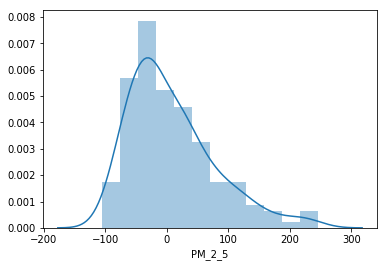

In [22]:
sns.distplot(y_test-pred)

In [23]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 54.3601264828372
Mean Sq Error: 4986.137781494488
Root Mean Error: 70.61258939802794


In [25]:
import pickle
pickle.dump(lasso_reg, open('Lasso.pkl', 'wb'))